# Метод гистограмм ориентированных градиентов (HOG)

HOG (Histogram of Oriented Gradients) - это метод компьютерного зрения, который используется для извлечения особых признаков из изображений. Он был предложен в 2005 году для задачи обнаружения объектов, особенно для обнаружения людей.

Основная идея метода HOG заключается в том, чтобы описать локальные градиенты яркости или направления краев в изображении. Для этого изображение разделяется на маленькие ячейки, и в каждой ячейке вычисляются градиенты яркости. Затем градиенты объединяются в гистограммы направлений, которые представляют распределение направлений градиентов в ячейке. Наконец, гистограммы объединяются в блоки, чтобы получить окончательное представление признаков.

Алгоритм HOG:

1. (необязательно) Глобальная нормализация изображения

2. Вычисление градиентного изображения по x и y

3. Вычисление градиентных гистограмм

4. Нормализация по блокам

5. Сведение в вектор признаков

На первом этапе применяется дополнительная глобальная корректировка нормализации изображения, предназначенная для уменьшения влияния эффектов освещения.

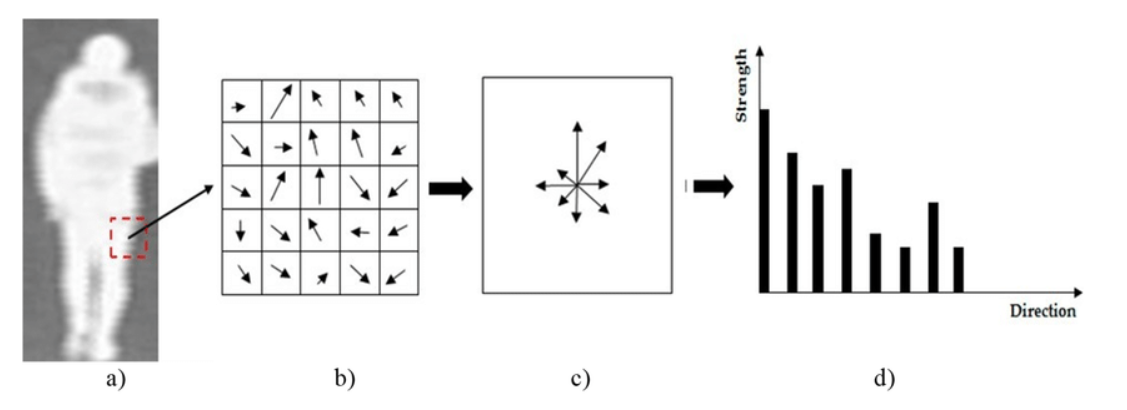!

Демонстрация метода извлечения признаков HOG: а) входное изображение; б) карта градиента с силой градиента и направлением субблока входного изображения; в) ориентация накопленного градиента; г) гистограмма ориентированных градиентов

[Источник](https://www.researchgate.net/figure/A-demonstration-of-the-HOG-feature-extraction-method-a-the-input-image-b-gradient-map_fig2_352419028)



[Оригинальная статья, с описанием метода](https://ieeexplore.ieee.org/document/1467360)

Что такое "градиент изображения"?

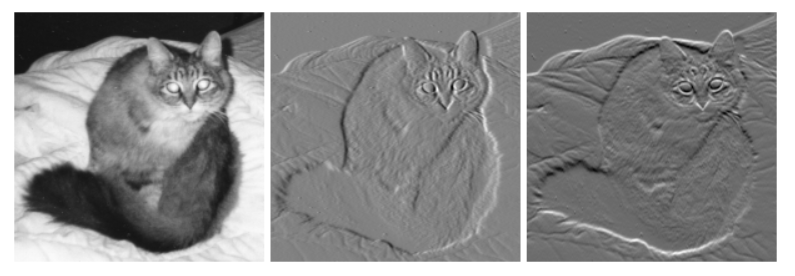

Подробнее читайте тут: [Википедия](https://en.wikipedia.org/wiki/Image_gradient)

In [ ]:
# установим необходимую библиотеку
%pip install scikit-image

In [ ]:
import os
import numpy as np
import pandas as pd

from skimage.feature import hog
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier #Multi-layer Perceptron classifier

Small Dataset of JPEG images useful for Classification of images into 'Alpaca' and 'Not Alpaca'. Learn more [here](https://www.kaggle.com/datasets/sid4sal/alpaca-dataset-smal).

In [ ]:
!unzip alpaca.zip -d alpaca
!unzip not_alpaca.zip -d not_alpaca

Archive:  alpaca.zip
   creating: alpaca/alpaca/
  inflating: alpaca/alpaca/01ad3ff1d94eb557.jpg  
  inflating: alpaca/alpaca/0346463867a297f4.jpg  
  inflating: alpaca/alpaca/038fae9e70c4c3f1.jpg  
  inflating: alpaca/alpaca/053608552d63f724.jpg  
  inflating: alpaca/alpaca/053dab62fbb47736.jpg  
  inflating: alpaca/alpaca/063a50c0a6408396.jpg  
  inflating: alpaca/alpaca/098cc30753a9cf13.jpg  
  inflating: alpaca/alpaca/09915aad4cd6bf0d.jpg  
  inflating: alpaca/alpaca/09e382a83978039b.jpg  
  inflating: alpaca/alpaca/0a2ea8f93b4cb30a.jpg  
  inflating: alpaca/alpaca/0b2a2c061ef16759.jpg  
  inflating: alpaca/alpaca/0cb5cae66bb9c4cd.jpg  
  inflating: alpaca/alpaca/0dba33ff827acee8.jpg  
  inflating: alpaca/alpaca/0e6044cdcd9318f3.jpg  
  inflating: alpaca/alpaca/0e6ba4d54d478f76.jpg  
  inflating: alpaca/alpaca/10371d58e9cf119d.jpg  
  inflating: alpaca/alpaca/1076411586a28251.jpg  
  inflating: alpaca/alpaca/122dea74b00f325e.jpg  
  inflating: alpaca/alpaca/1242ba953cd74e4b.jpg  
 

In [ ]:
#Чтение файлов с данными
# Картинки на которых присутствует идентифицируемый объект (корова)

path = "/content/alpaca/alpaca" # ваш путь к картинкам
cls1 = os.listdir(path)
n1 = len(cls1)
image1 = []

for i in range(n1):
    image = resize(imread(os.path.join(path, cls1[i])),
                   (200, 200, 1)) # для применения метода, приводим изображения к одному размеру
    image1.append(image)

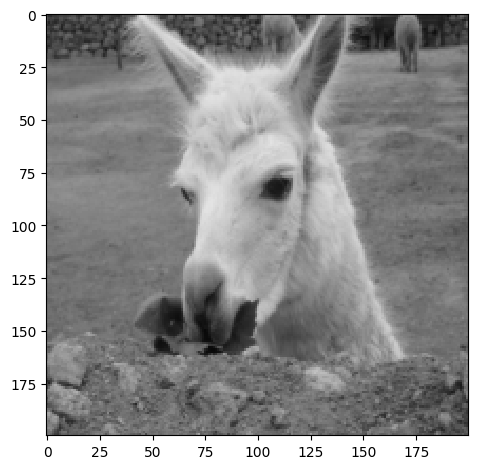

In [ ]:
imshow(image1[100])

In [ ]:
# Картинки на которых нет идентифицируемого объекта

path = "/content/not_alpaca/not alpaca"
cls2 = os.listdir(path)
n2 = len(cls2)
image2 = []

for i in range(n2):
    image = resize(imread(os.path.join(path, cls2[i])), (200, 200, 1))
    image2.append(image)

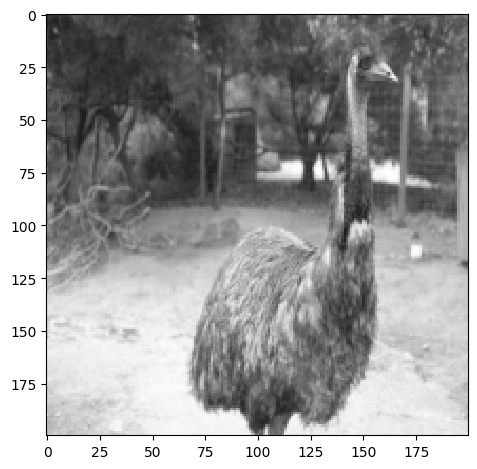

In [ ]:
imshow(image2[100])

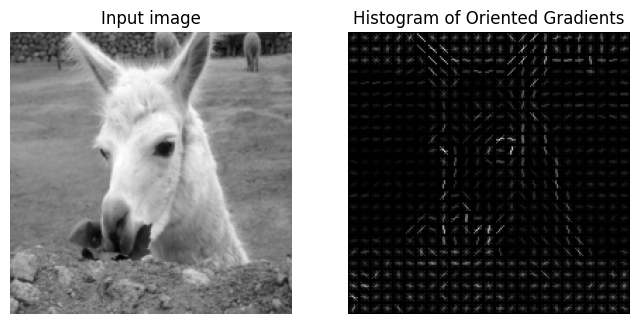

In [ ]:
#Сначала давайте применим HOG алгоритм к одному изображению и посмотрим на результат

fd, hog_image = hog(image1[100], orientations=6, pixels_per_cell=(8, 8), cells_per_block=(3, 3),visualize=True,
                        channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image1[100], cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(hog_image, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [ ]:
# Применяем метод HOG (выделяем признаки)
hog_images1 = []
hog_features1 = []
#Получаем значения для HOG для обоих наборов данных и строим их
for img in image1:
    fd, hog_image = hog(img, orientations=6, pixels_per_cell=(8, 8), cells_per_block=(3, 3),visualize=True,
                        channel_axis=-1)
    hog_images1.append(hog_image)
    hog_features1.append(fd)

In [ ]:
# Применяем метод HOG (выделяем признаки)
hog_images2 = []
hog_features2 = []
#Получаем значения для HOG для обоих наборов данных и строим их
for img in image2:
    fd, hog_image = hog(img, orientations=6, pixels_per_cell=(8, 8), cells_per_block=(3, 3),visualize=True,
                        channel_axis=-1)
    hog_images2.append(hog_image)
    hog_features2.append(fd)

In [ ]:
# Превратим наши массивы в датафрейм и присвоим класс нашим картинкам
# 1 - альпака, 0 - пейзаж
hog_features1 = np.vstack(hog_features1)
df1 = pd.DataFrame(hog_features1)
hog_features2 = np.vstack(hog_features2)
df2 = pd.DataFrame(hog_features2)
df1['Class'] = 1
df2['Class'] = 0
data = pd.concat([df1, df2], axis=0)
data = data.sample(frac=1).reset_index(drop=True) #перемешиваем данные

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,28557,28558,28559,28560,28561,28562,28563,28564,28565,Class
0,0.060323,2.334500e-02,5.747678e-02,0.266470,0.103527,0.030859,0.049252,3.625528e-02,0.266470,0.204132,...,0.122474,0.189439,0.078536,0.206616,0.180792,0.071326,0.208810,0.111955,0.124076,0
1,0.083798,1.161015e-01,4.062508e-02,0.110236,0.098180,0.045599,0.188924,1.957105e-02,0.003632,0.063122,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.105907,1.121823e-01,9.814466e-02,0.211983,0.068812,0.128476,0.102951,3.001737e-02,0.039453,0.040886,...,0.219866,0.196673,0.062425,0.047629,0.042102,0.147355,0.232237,0.024488,0.017764,0
3,0.084727,9.902471e-03,3.874198e-03,0.032448,0.021015,0.284392,0.181919,6.451334e-02,0.069610,0.074763,...,0.159484,0.152607,0.116458,0.214877,0.183534,0.065783,0.115431,0.094341,0.083070,1
4,0.000315,4.996270e-15,2.633265e-15,0.016104,0.000007,0.013003,0.074545,1.665423e-15,0.091659,0.134369,...,0.180461,0.043806,0.065855,0.174546,0.078030,0.185046,0.118000,0.048971,0.056012,0


In [ ]:
# разделим данные для обучения

X = data.drop(columns=['Class'])
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# применим к данным 4 классификатора: kNN, SVM, дерево решений, и классификатор, основанный на нейросети
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
res_knn = knn_model.predict(X_test.values)

svm_model = SVC(probability=True, kernel="linear")
svm_model.fit(X_train, y_train)
res_svm = svm_model.predict(X_test)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
res_dt = dt_model.predict(X_test)

NN_model = MLPClassifier()
NN_model.fit(X_train, y_train)
res_NN = NN_model.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


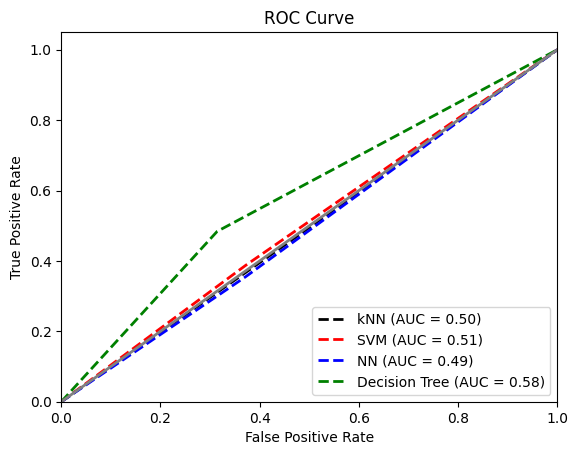

In [ ]:
# Оценим качество работы классификаторов

# Вычисление ROC-кривых
fpr_knn, tpr_knn, _ = roc_curve(y_test, res_knn)
fpr_svm, tpr_svm, _ = roc_curve(y_test, res_svm)
fpr_nb, tpr_nb, _ = roc_curve(y_test, res_NN)
fpr_dt, tpr_dt, _ = roc_curve(y_test, res_dt)

# Рассчитать площадь под ROC-кривой (AUC-ROC)
auc_knn = roc_auc_score(y_test, res_knn)
auc_svm = roc_auc_score(y_test, res_svm)
auc_nb = roc_auc_score(y_test, res_NN)
auc_dt = roc_auc_score(y_test, res_dt)

# Визуализировать ROC-кривую
plt.plot(fpr_knn, tpr_knn, color='black', lw=2, linestyle='--', label=f'kNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, linestyle='--', label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, linestyle='--', label=f'NN (AUC = {auc_nb:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, linestyle='--', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print('Результат kNN: \n', classification_report(y_test, res_knn))
print('Результат SVM: \n', classification_report(y_test, res_svm))
print('Результат Decision Tree: \n', classification_report(y_test, res_dt))
print('Результат Neural Network: \n', classification_report(y_test, res_NN))

Результат kNN: 
               precision    recall  f1-score   support

           0       0.53      0.54      0.54        35
           1       0.47      0.45      0.46        31

    accuracy                           0.50        66
   macro avg       0.50      0.50      0.50        66
weighted avg       0.50      0.50      0.50        66

Результат SVM: 
               precision    recall  f1-score   support

           0       0.54      0.63      0.58        35
           1       0.48      0.39      0.43        31

    accuracy                           0.52        66
   macro avg       0.51      0.51      0.50        66
weighted avg       0.51      0.52      0.51        66

Результат Decision Tree: 
               precision    recall  f1-score   support

           0       0.60      0.69      0.64        35
           1       0.58      0.48      0.53        31

    accuracy                           0.59        66
   macro avg       0.59      0.58      0.58        66
weighted avg 